In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as pl
%matplotlib inline

# This notebook is based on an excellent tutorial by Kostis Gourgoulias (http://kgourgou.me/)

# Specify size of plot
pl.rcParams['figure.figsize'] = (12.0, 10.0)

# Playing around with the linear perceptron algorithm

The linear perceptron algorithm can be used to classify data points according to pre-selected features they have. The idea is to find a curve (or hyperplane) that separates points with different features. Once we have the curve, we can use it to decide if future points are of feature A or B based on where they are with respect to the curve (above or below it).

Now, let generate a collection of points and then paint them according to a line. If the points are above the line, they are blue, if they are below, green.

Text(0.5,1,'Selected points with their separating line.')

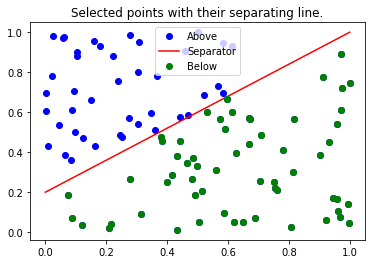

In [3]:
# Generate some points
N = 100
xn = nr.rand(N,2)

x = np.linspace(0,1)

# Pick a line 
#a, b = nr.rand(), nr.rand()
a, b = 0.8, 0.2
f = lambda x : a*x + b

fig = pl.figure()
figa = pl.gca()

pl.plot(xn[:,0],xn[:,1],'bo')
pl.plot(x,f(x),'r')

# Linearly separate the points by the line
yn = np.zeros([N,1])

for i in range(N):
    if(f(xn[i,0])>xn[i,1]):
        # Point is below line
        yn[i] = 1
        pl.plot(xn[i,0],xn[i,1],'go')
    else:
        # Point is above line
        yn[i] = -1
        
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
#figa.axes.get_xaxis().set_visible(False)
#figa.axes.get_yaxis().set_visible(False)

The curve naturally separates the space into two regions, one of green points and one of blue points. Thus, if I am given a new point, I can assign it a color based on where it is with respect to the curve. It is really that simple.

What is not so simple is to find the curve given the points. However, if the points are linearly separable, i.e. if a line exists that does the job, then I can just move a line around until I get it to the correct position. This is what the linear perceptron algorithm is doing.

In [6]:
def perceptron(xn, yn, max_iter=1000, w=np.zeros(3)):
    '''
        A very simple implementation of the perceptron algorithm for two dimensional data.
        
        Given points (x,y) with x in R^{2} and y in {-1,1}, the perceptron learning algorithm searches for the best
        line that separates the data points according to the difference classes defined in y. 
        
        Input: 
            xn : Data points, an Nx2 vector. 
            yn : Classification of the previous data points, an Nx1 vector. 
            max_iter : Maximum number of iterations (optional).
            w  : Initial vector of parameters (optional).
            
        Output: 
            w : Parameters of the best line, y = ax+b, that linearly separates the data. 
        
        Note:
            Convergence will be slower than expected, since this implementation picks points
            to update without a specific plan (randomly). This is enough for a demonstration, not 
            so good for actual work. 
'''
    
    N = xn.shape[0]
    
    # Separating curve
    f = lambda x: np.sign(w[0]+w[1]*x[0]+w[2]*x[1])

    for _ in range(max_iter):
        i = nr.randint(N) # try a random sample from the dataset
        print(i, xn[i,0], xn[i,1], f(xn[i,:]), yn[i])
        if(yn[i] != f(xn[i,:])): # If not classified correctly, adjust the line to account for that point.
            w[0] = w[0] + yn[i] # the first weight is effectively the bias
            w[1] = w[1] + yn[i] * xn[i,0]
            w[2] = w[2] + yn[i] * xn[i,1]
            
                
                
            
    return w

w = perceptron(xn, yn, max_iter=5)

95 0.09769618689376192 0.5018060681003306 0.0 [-1.]
30 0.16229983089509592 0.4336559626265507 -1.0 [-1.]
77 0.7499571580605265 0.2500878302193279 -1.0 [1.]
83 0.6135948731230253 0.6032462194328589 1.0 [1.]
19 0.5310405458965853 0.6012187334377812 1.0 [1.]


Now that we have an implementation, let's see how close it gets.


93 0.8088261106140903 0.026113759246733093 1.0 [1.]
30 0.16229983089509592 0.4336559626265507 -1.0 [-1.]
8 0.6206587694276604 0.053499456616102115 1.0 [1.]
0 0.3055028046998426 0.8003221805375078 -1.0 [-1.]
37 0.8164981841884629 0.5660071244047703 1.0 [1.]
40 0.9227990077448821 0.059608448683319715 1.0 [1.]
72 0.21598049543964215 0.03903968373500899 1.0 [1.]
91 0.5658467431172668 0.7329015406148803 1.0 [-1.]
5 0.09570103591782331 0.7047137744641978 -1.0 [-1.]
39 0.5839259755275574 0.6942581734049088 -1.0 [-1.]
27 0.10333132919877619 0.9016958973661414 -1.0 [-1.]
12 0.597752961431511 0.6671124241681418 -1.0 [1.]
69 0.5856067346771352 0.09844729662478491 1.0 [1.]
91 0.5658467431172668 0.7329015406148803 1.0 [-1.]
19 0.5310405458965853 0.6012187334377812 -1.0 [1.]
88 0.24672522909582606 0.48471342776851845 -1.0 [-1.]
45 0.3080442162061099 0.9503741795101189 -1.0 [-1.]
44 0.27628435922383443 0.5708916547671233 -1.0 [-1.]
48 0.22295040306934222 0.8810504769728267 -1.0 [-1.]
44 0.27628435922

4 0.704996944114904 0.2564925222563418 1.0 [1.]
49 0.5030438594873614 0.9998267449377208 -1.0 [-1.]
62 0.06252553330449451 0.9778547291005455 -1.0 [-1.]
91 0.5658467431172668 0.7329015406148803 -1.0 [-1.]
79 0.08377278328089377 0.363093889609583 -1.0 [-1.]
69 0.5856067346771352 0.09844729662478491 1.0 [1.]
39 0.5839259755275574 0.6942581734049088 -1.0 [-1.]
11 0.05741460548025268 0.9706418030129871 -1.0 [-1.]
81 0.44347200934094966 0.5752478403888039 -1.0 [-1.]
60 0.9990261757182958 0.045294632156640424 1.0 [1.]
72 0.21598049543964215 0.03903968373500899 1.0 [1.]
39 0.5839259755275574 0.6942581734049088 -1.0 [-1.]
60 0.9990261757182958 0.045294632156640424 1.0 [1.]
72 0.21598049543964215 0.03903968373500899 1.0 [1.]
83 0.6135948731230253 0.6032462194328589 1.0 [1.]
84 0.6135712529198523 0.9290461118164312 -1.0 [-1.]
11 0.05741460548025268 0.9706418030129871 -1.0 [-1.]
26 0.3138424712556336 0.09047968205253887 1.0 [1.]
33 0.7597963154273153 0.2100568717536765 1.0 [1.]
46 0.7547759907539

73 0.34869103868366136 0.5939634992403283 1.0 [-1.]
1 0.07352662881287875 0.18416064820347178 -1.0 [1.]
75 0.3823343146987852 0.45726660445772516 1.0 [1.]
58 0.5158052458195292 0.20710841130355018 1.0 [1.]
61 0.18019689477491474 0.9335808496953605 -1.0 [-1.]
41 0.9029561242205636 0.3862845198844794 1.0 [1.]
20 0.957148176823849 0.539892954959113 1.0 [1.]
51 0.483002548085368 0.26578930153170854 1.0 [1.]
92 0.48615708001157987 0.3713031463878571 1.0 [1.]
26 0.3138424712556336 0.09047968205253887 1.0 [1.]
42 0.9139033454426393 0.7756941859734466 1.0 [1.]
96 0.3681490052659787 0.7826554427549565 -1.0 [-1.]
59 0.9746526036305336 0.722640812648001 1.0 [1.]
24 0.023265247771449005 0.7821683574725474 -1.0 [-1.]
56 0.38129160340712476 0.4766737239035804 1.0 [1.]
47 0.7084440262940388 0.4865053222968593 1.0 [1.]
28 0.43434698027935703 0.011586693227788603 1.0 [1.]
38 0.5912682746033987 0.518068352670957 1.0 [1.]
52 0.669352218004513 0.5704782748479612 1.0 [1.]
90 0.6481757359608523 0.0524331842

65 0.9713494403013969 0.6119968511354273 1.0 [1.]
53 0.7823517173491157 0.41236644152819224 1.0 [1.]
58 0.5158052458195292 0.20710841130355018 1.0 [1.]
12 0.597752961431511 0.6671124241681418 1.0 [1.]
85 0.4918472267601812 0.18735116135214325 1.0 [1.]
51 0.483002548085368 0.26578930153170854 1.0 [1.]
32 0.96138912012158 0.10856422317646841 1.0 [1.]
82 0.5602252118304201 0.30963253967870363 1.0 [1.]
55 0.3030999294316983 0.5433577227500612 -1.0 [-1.]
21 0.4979566935429207 0.32965432074575496 1.0 [1.]
8 0.6206587694276604 0.053499456616102115 1.0 [1.]
14 0.99355086931427 0.139659500788206 1.0 [1.]
83 0.6135948731230253 0.6032462194328589 1.0 [1.]
67 0.5756493363168621 0.5673727278062908 1.0 [1.]
52 0.669352218004513 0.5704782748479612 1.0 [1.]
66 0.6884872897003091 0.07153905598327481 1.0 [1.]
61 0.18019689477491474 0.9335808496953605 -1.0 [-1.]
20 0.957148176823849 0.539892954959113 1.0 [1.]
44 0.27628435922383443 0.5708916547671233 -1.0 [-1.]
41 0.9029561242205636 0.3862845198844794 1.

ValueError: c of shape (100, 1) not acceptable as a color sequence for x with size 100, y with size 100

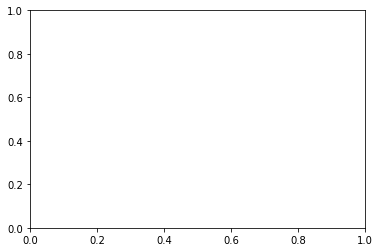

In [7]:
w = perceptron(xn, yn)

# Using weights w to compute a,b for a line y=a*x+b
bnew = -w[0]/w[2];
anew = -w[1]/w[2];
y = lambda x: anew * x + bnew;

# Computing the colors for the points
sep_color = (yn+1)/2.0;

pl.figure();
figa = pl.gca()

pl.scatter(xn[:,0],xn[:,1],c=sep_color, s=30)
pl.plot(x,y(x),'b--',label='Line from perceptron implementation.')
pl.plot(x,f(x),'r',label='Original line.')
pl.legend()

pl.title('Comparison between the linear separator and the perceptron approximation.')